In [1]:
from slsim.Deflectors.massive_deflectors_DP0p2 import find_massive_ellipticals
import numpy as np
import matplotlib.ticker as ticker
from astropy.table import Table
import matplotlib.pyplot as plt
from uncertainties import unumpy


ModuleNotFoundError: No module named 'lenstronomy.SimulationAPI.mag_amp_conversion'

This notebook demonstrates how to use the 'query_galaxies_as_deflectors.py' module in slsim to query a galaxy catalog and idenitfy which of the galaxies can act as potential deflectors.  
Please download the catalogs 'DP0_catalog_z_0p55_0p56.csv' from 'https://github.com/LSST-strong-lensing/data_public' for running this notebook.

In [6]:
def unmask_array(arr, fill_value=np.nan):
    """
    Convert any MaskedArray to an ndarray with a fill value
    """
    if isinstance(arr, np.ma.MaskedArray):
        return arr.filled(fill_value)
    return arr

In [13]:
# Load a DP0 sub-catalog as astropy table and convert the masked elements in DP0 coulmns to ndarray, if any
DP0_table = Table.read('DP0_catalog_z_0p55_0p56.csv')


for col in DP0_table.colnames:
    DP0_table[col] = unmask_array(DP0_table[col])


# Find the massive ellipticals from DP0 galaxies using massive_ellipticals_DP0 module
DP0_massive_ellipticals = find_massive_ellipticals(DP0_table)

print(len(DP0_massive_ellipticals),' massive ellipticals found out of ', len(DP0_table),' total galaxies in 0.55 < z < 0.56.')

7620  massive ellipticals found out of  270983  total galaxies in 0.55 < z < 0.56.


For the DP0 massive ellipticals returned above, plot the distributions of position angle, half light radius,  
axis ratio, ellipticity, and the stellar velocity dispersion.

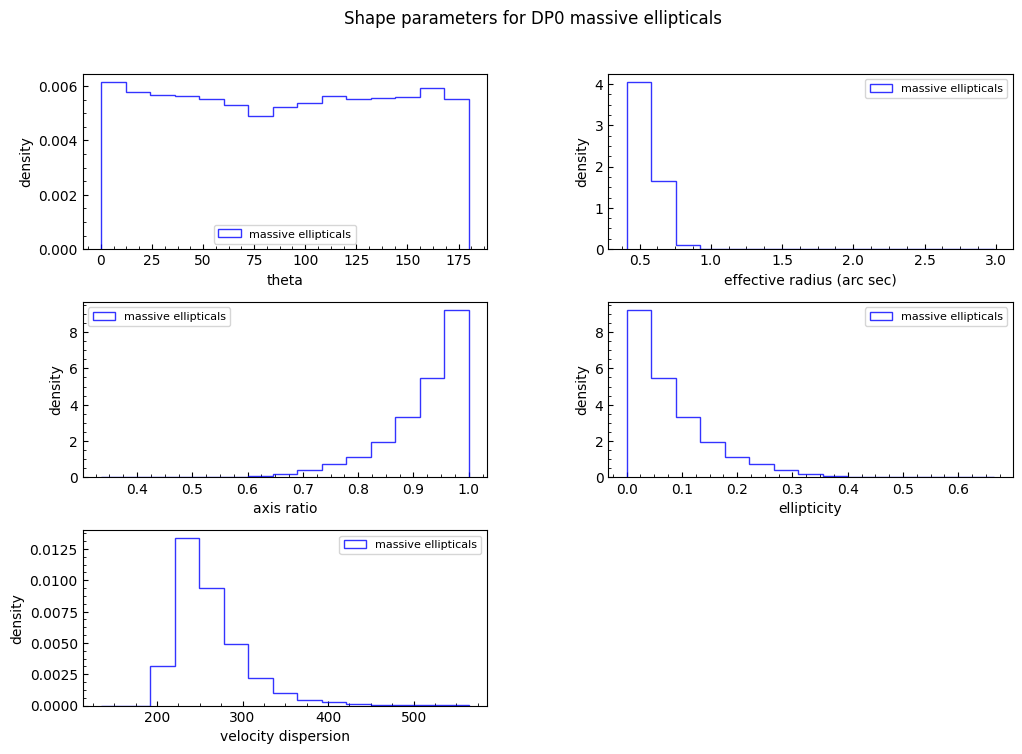

In [12]:


theta_all, r_eff_all, q_all, ellipticity_all = DP0_massive_ellipticals['position angle'], DP0_massive_ellipticals['effective radius'], DP0_massive_ellipticals['axis ratio'], DP0_massive_ellipticals['ellipticity']

velocity_dispersion_all = unumpy.nominal_values(DP0_massive_ellipticals['velocity dispersion'])


y_arr = [theta_all, r_eff_all, q_all, ellipticity_all, velocity_dispersion_all]

names = ['theta', 'effective radius (arc sec)', 'axis ratio' ,'ellipticity', 'velocity dispersion']


bin_width = [15,15,15,15,15]

fig, axes = plt.subplots(3, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.9)

axes = axes.flatten()

for i, ax in enumerate(axes):
    if(i==5):
        plt.axis('off')
        continue
    
    ax.hist(y_arr[i],bins=bin_width[i],facecolor='none',density=True,edgecolor='blue',alpha=0.8,histtype='step',label='massive ellipticals')

    ax.set_xlabel(f'{names[i]}')
    ax.set_ylabel('density')
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(4))  # 2 minor ticks between major ticks on x-axis
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))  # 4 minor ticks between major ticks on y-axis
    ax.tick_params(direction='in', which='both')

    ax.legend(loc='best',fontsize=8)



plt.suptitle('Shape parameters for DP0 massive ellipticals')
plt.show()